# Computer science center
## Математика для разработчиков
Семинар 4. Линейная алгебра

## Ранг матрицы

In [1]:
import numpy as np
from numpy.linalg import matrix_rank

A = np.array([
    [1,-1,0,0],
    [1,0,-1,0],
    [1,0,0,-1],
    [0,1,-1,0],
    [0,1,0,-1],
    [0,0,1,-1]
]) 
print(f'rank = {matrix_rank(A)}')

rank = 3


## Система линейных алгебраических уравнений

In [2]:
import scipy.linalg as sla

A = np.array([
    [1,1,1],
    [1,2,2],
    [2,3,-4]
]) 
print(f'determinant = {sla.det(A)}')

# solve a linear system
x = np.array([1, 3, 2])
b = A.dot(x).reshape(3, 1) # для linalg.solve из scipy
x1 = sla.solve(A, b)
print(f'residual = {sla.norm(x1.reshape(3) - x)}')

determinant = -7.0
residual = 0.0


## LU-разложение

С точки зрения математики матричные разложения являются точными: произведение сомножителей всегда равняется исходной матрице $A$. К сожалению, на практике этом часто мешает вычислительная погрешность. 

Для $LU$ разложения l2-норма ошибки ошибки $||\delta A|| = ||A - LU||$ удовлетворяет следующей оценке:

$$||\delta A|| \leqslant ||L|| \cdot ||U|| \cdot O(\varepsilon_{machine})$$

А нормы $L$ и $U$ могут быть совсем нехорошими.

### LU-разложение с выбором главного элемента (по столбцу)

Каждый раз ищем максимум в столбце и переставляем соответствующую строку наверх.

$$\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow
\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow$$
$$\longrightarrow\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & 0 & b'_{i+1,i+1} & \dots & b'_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & 0 & b'_{i,i+1} & \dots & b'_{in} \\
 & & \vdots & \vdots & & \vdots
\end{pmatrix}$$


Надо сказать, что примерно так вы и решали системы на первом курсе университета! Именно наибольший, а не первый ненулевой элемент столбца берётся потому, что чем больше число $-$ тем меньшие погрешности потенциально вносит деление на него.

Что при этом происходит? Перестановка строк матрицы равносильна умножению её слева на матрицу соответствующей перестановки. Таким образом, мы получаем равенство

$$L_nP_nL_{n-1}P_{n-1}\ldots L_2P_2L_1P_1 A = U\qquad\qquad(1)$$

где $L_1,\ldots,L_n$ - некоторые нижнетреугольные матрицы.

**Вопрос:** Ну, и где здесь матрица $L$?!

**Ответ:** Введём новые матрицы

\begin{align*}
L'_n &= L_n\\
L'_{n-1} &= P_nL_{n-1}P_{n}^{-1}\\
L'_{n-2} &= P_nP_{n-1}L_{n-2}P_n^{-1}P_{n-1}^{-1}\\
&\ldots\\
L'_1 &= P_nP_{n-1}\ldots P_2L_1P_2^{-1}\ldots P_{n-1}^{-1}P_n^{-1}
\end{align*}

**Упражнение.** Матрицы $L'_i$ тоже нижнетреугольные!

Тогда левая часть (1) перепишется в виде

$$\underbrace{L'_nL'_{n-1}\ldots L'_1}_{:=L^{-1}}\underbrace{P_nP_{n-1}\ldots P_1}_{:=P^{-1}}\cdot A$$

**Итог:** разложение вида
$$A = PLU$$
где $P$ - матрица перестановки.


Функция `scipy.linalg.lu` в Питоне находит именно такое разложение!

Все элементы $L$ не превосходят $1$, так что $||L||]\leqslant 1$. При этом
$$||\Delta A|| \leqslant ||A||\cdot O(\rho \varepsilon_{machine}),$$
где
$$\rho = \frac{\max_{i,j}|u_{ij}|}{\max_{i,j}|a_{ij}|}$$
Это число называется *фактором роста матрицы*.

Но что, если это отношение велико?

**Задание 4.1.** Сгенерируйте матрицу $500\times500$, имеющую вид

$$\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 1\\
-1 & 1 & 0 &  &  & 0 & 1\\
-1 & -1 & 1 & 0  &  & 0 & 1\\
\vdots & & \ddots & \ddots  & \ddots & \vdots & \vdots \\
-1 & -1 & -1 & \ddots & 1 & 0 & 1\\
-1 & -1 & -1 &  & -1 & 1 & 1\\
-1 & -1 & -1 & \cdots & -1 & -1 & 1
\end{pmatrix}$$

Например, вы можете сгенерировать сначала нулевую матрицу нужного размера, а потом заполнить её клетки правильными числами.

Найдите её PLU-разложение и QR-разложение. Убедитесь, что $P = E$. Вычислите $||A - LU||_2$ и $||A - QR||_2$. Чему равен фактор роста матрицы $A$?

In [3]:
n = 500
A = -np.tri(n, n, -1) + np.diag([1] * n)
A[:, n-1] = [1] * n
P, L, U = sla.lu(A)

In [4]:
(P == np.identity(n)).all()

True

In [5]:
LU_norm = sla.norm(A - L.dot(U), 2)
print(f'LU_norm = {LU_norm}')

Q, R = sla.qr(A)
QR_norm = sla.norm(A - Q.dot(R), 2)
print(f'QR_norm = {QR_norm}')

U_abs = np.absolute(U)
A_abs = np.absolute(A)
rho = U_abs.max() / A_abs.max()
print(f'rho = {rho}')

LU_norm = 2.5329519520662918e+76
QR_norm = 7.748592225286441e-13
rho = 1.636695303948071e+150


**Задание 4.2.** 
Рассмотрим *матрицу Паскаля* $S_n = \left(C_{i + j}^i\right)$ ($i,j = 0,\ldots,n-1$).

Каково её LU-разложение? Выведите формулы для матриц L и U и приведите краткое обоснование. Каков её определитель?

По определению и свёртке Вандермонда: $S_{ij} = C_{i+j}^i = \sum_{k=0}^{n-1}C_i^{i-k} C_j^k = \sum_{k=0}^{n-1}C_i^{k} C_j^k$

С другой стороны $S_{ij}$ можно рассмотреть как произведение двух матриц $L$ и $U$: $S_{ij} = \sum_{k=0}^{n-1} L_{ik} U_{kj}$

Тогда в качестве нижнетреугольной матрицы $L$ можем взять $C_i^j$, а в качестве верхнетреугольной $U$ взять $C_j^i$. Тогда $L$ и $U$ будут также треугольниками Паскаля (в привычной форме и перевернутый). 

Определитель треугольной матрицы равен произведению ее диагональных элементов. У матриц $L$ и $U$ на диагоналях всегда стоят единицы ($C_i^i$), поэтому и $det|S| = 1$.

**Задание 4.3.** Пример: вычисление логарифма плотности многомерного нормального распределения.

Случайная величина $\vec{x}\in\mathbb{R}^D$ имеет многомерное нормальное распределение, если её плотность может быть представлена как
$$
p(\vec{x}) = \mathcal{N}(\vec{x}|\vec{\mu},\Sigma) = \frac{1}{\sqrt{2\pi}^D\sqrt{\det\Sigma}}\exp\left(-\frac{1}{2}(\vec{x}-\vec{\mu})^T\Sigma^{-1}(\vec{x}-\vec{\mu})\right)
$$
Здесь $\vec{\mu}\in\mathbb{R}^D -$ вектор мат. ожидания $\vec{x}$, а $\Sigma\in\mathbb{R}^{D{\times}D} -$ матрица ковариации.

С помощью матричных разложений реализуйте алгоритм вычисления логарифма нормальной плотности для набора векторов $X = \{\vec{x}_1,\dots,\vec{x}_N\}$ для заданных $\vec{\mu}$ и $\Sigma$.

*Решение*

При реализации будем использовать [разложение Холецкого](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A5%D0%BE%D0%BB%D0%B5%D1%86%D0%BA%D0%BE%D0%B3%D0%BE) для упрощения выражения в степени экспоненты:
$$-\frac{1}{2}(x-m)^T \Sigma^{-1}(x-m)$$
Пусть $x - m = t$, произведем разложение Холецкого для $\Sigma$
$$\Sigma = L L^T = U^T U$$
Получаем:
$$t^T (U^T U)^{-1} t = t^T U^{-1} U^{-T} t = || U^{-T} t ||_2^2$$
Пусть $U^{-T} t = z$, решаем систему $U^T z = t$. Получаем, что $z^2$ $-$ выражение в степени экспоненты.

Таким образом, мы свели вычисление выражения в степени экспоненты к решению системы линейных уравнений с помощью разложения Холецкого.

В алгоритме используются дополнительные оптимизации для вычисления логарифма, базирующиеся на основных логарифмических тождествах.

In [6]:
def cho_scipy_solve(A, b):
    C_cho = sla.cho_factor(A)
    return sla.cho_solve(C_cho, b)

def my_multivariate_normal_logpdf(X, m, S):
    '''
    Ввод
    -----
    X: набор точек, numpy array размера N x D;
    m: вектор средних значений, numpy array длины D;
    S: ковариационная матрица, numpy array размера D x D.
    
    Вывод
    ------
    res: результат вычислений, numpy array длины N.
    '''
    (N, D) = X.shape
    assert D == len(m), "Error: X.shape[1] != len(m)"
    assert D == S.shape[0] and D == S.shape[1], "Error: S has wrong shape"    
    
    det_S = sla.det(S)
    assert det_S > 0, "Error: det(S) <= 0"
    norm_const = -D/2. * np.log(2.*np.pi) - 0.5 * np.log(det_S)
    
    zs = cho_scipy_solve(S, np.transpose(X - m))
    res = 0.5 * (zs * zs).sum(axis=0) 
    return norm_const - res

In [7]:
# Let's test this!
X_testing = np.random.multivariate_normal(np.zeros(6), np.eye(6), 5)
assert my_multivariate_normal_logpdf(X_testing, np.zeros(6), np.eye(6)).shape == (5,)

In [8]:
from scipy.stats import multivariate_normal
D = 2000
N = 20
X_testing = np.random.multivariate_normal(np.zeros(D), np.eye(D), N)
multivariate_normal.logpdf(X_testing, np.zeros(D), np.eye(D))

array([-2857.42620268, -2773.49899359, -2816.43477782, -2841.53151686,
       -2826.18779111, -2832.33188073, -2779.771332  , -2819.2417518 ,
       -2878.90238337, -2832.07866289, -2821.78412806, -2847.21254571,
       -2865.84238586, -2830.03790911, -2837.04649361, -2811.61155762,
       -2820.53865359, -2824.85942104, -2880.0473315 , -2871.58465451])

In [9]:
my_multivariate_normal_logpdf(X_testing, np.zeros(D), np.eye(D))

array([-2857.42620268, -2773.49899359, -2816.43477782, -2841.53151686,
       -2826.18779111, -2832.33188073, -2779.771332  , -2819.2417518 ,
       -2878.90238337, -2832.07866289, -2821.78412806, -2847.21254571,
       -2865.84238586, -2830.03790911, -2837.04649361, -2811.61155762,
       -2820.53865359, -2824.85942104, -2880.0473315 , -2871.58465451])

In [10]:
import pandas as pd
import timeit
from tqdm import tqdm

multivariate_normal_results = pd.DataFrame(index=range(1, 1000, 10), columns=['resudial','lib_time','my_time'])
N = 25
for D in tqdm(range(1, 1000, 10)):
    X_testing = np.random.multivariate_normal(np.zeros(D), np.eye(D), N)
    
    start_time = timeit.default_timer()
    lib_res = multivariate_normal.logpdf(X_testing, np.zeros(D), np.eye(D))
    lib_elapsed = timeit.default_timer() - start_time
    
    start_time = timeit.default_timer()
    my_res = my_multivariate_normal_logpdf(X_testing, np.zeros(D), np.eye(D))
    my_elapsed = timeit.default_timer() - start_time
    
    multivariate_normal_results.loc[D]['resudial'] = sla.norm(lib_res - my_res)
    multivariate_normal_results.loc[D]['lib_time'] = lib_elapsed
    multivariate_normal_results.loc[D]['my_time']  = my_elapsed

100%|██████████| 100/100 [03:06<00:00,  7.52s/it]


Text(0.5, 0.98, 'Сравнение функций вычисления логарифма плотности МНР')

Text(0.5, 1.0, 'Время работы с увеличением D')

Text(0.5, 0, 'D')

Text(0, 0.5, 'Время')

Text(0.5, 1.0, 'Норма разницы результатов моей функции и стандартной')

Text(0.5, 0, 'resudial')

Text(0, 0.5, 'Время')

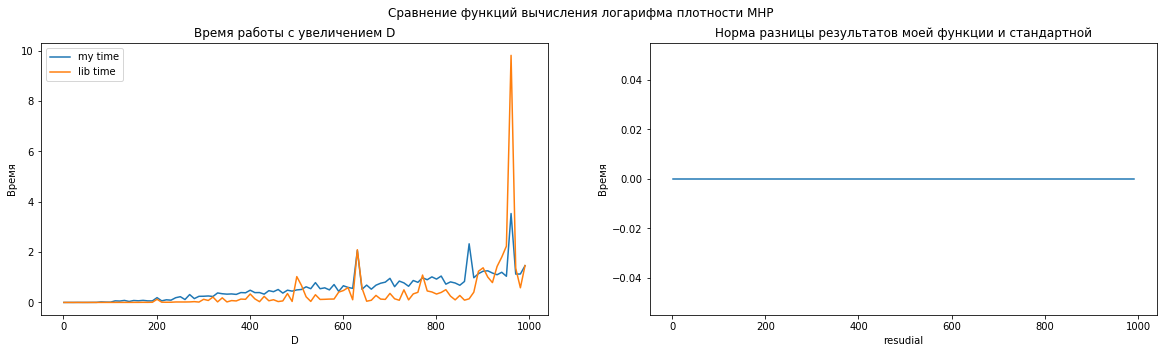

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,2, figsize=(20,5))
f.suptitle('Сравнение функций вычисления логарифма плотности МНР')

ax[0].plot(multivariate_normal_results['my_time'], label='my time')
ax[0].plot(multivariate_normal_results['lib_time'], label='lib time')
ax[0].legend(loc=2)
ax[0].set_title('Время работы с увеличением D')
ax[0].set_xlabel('D')
ax[0].set_ylabel('Время')

ax[1].plot(multivariate_normal_results['resudial'])
ax[1].set_title('Норма разницы результатов моей функции и стандартной')
ax[1].set_xlabel('resudial')
ax[1].set_ylabel('Время')

Спасибо за внимание, всё на сегодня и в целом по курсу :)